# Voice-Driven Disease Classification: A Deep Learning Approach


In [1]:
import pandas as pd
import torch
import torchaudio
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
from model.classifier import Classifier

%load_ext autoreload
%autoreload 2

In [2]:
record_df = pd.read_csv("./data/overview-of-recordings.csv")

# print the number of recordings
print("Number of recordings: ", len(record_df))
print("Number of features: ", len(record_df.columns))

Number of recordings:  6661
Number of features:  13


In [3]:
# check if we have the same number of audio files (.wav) as we have rows in the dataframe
data_dir = "./data/recordings"
nb_training_samples = len(os.listdir(os.path.join(data_dir, "train")))
nb_validation_samples = len(os.listdir(os.path.join(data_dir, "validate")))
nb_test_samples = len(os.listdir(os.path.join(data_dir, "test")))
print("Number of training samples: ", nb_training_samples)
print("Number of validation samples: ", nb_validation_samples)
print("Number of test samples: ", nb_test_samples)
print("Total number of samples: ", nb_training_samples + nb_test_samples + nb_validation_samples)


Number of training samples:  381
Number of validation samples:  385
Number of test samples:  5895
Total number of samples:  6661


### Add a column to indicate if the record is in the training set, validation set, or test set 


In [5]:
train_files = set(os.listdir(os.path.join(data_dir, "train")))
valid_files = set(os.listdir(os.path.join(data_dir, "validate")))
test_files = set(os.listdir(os.path.join(data_dir, "test")))

record_df["split"] = record_df["file_name"].apply(lambda x: "train" if x in train_files else ("validate" if x in valid_files else "test"))

# check if the numbers corresponds to the previous numbers
print("Number of training samples: ", len(record_df[record_df.split == "train"]))
print("Number of validation samples: ", len(record_df[record_df.split == "validate"]))
print("Number of test samples: ", len(record_df[record_df.split == "test"]))

record_df.head(2)

Number of training samples:  381
Number of validation samples:  385
Number of test samples:  5895


,audio_clipping,audio_clipping:confidence,background_noise_audible,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker,quiet_speaker:confidence,speaker_id,file_download,file_name,phrase,prompt,writer_id,split
0,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,43453425,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43453425_58166571.wav,When I remember her I feel down,Emotional pain,21665495,test
1,light_clipping,0.6803,no_noise,0.6803,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_43347848.wav,When I carry heavy things I feel like breaking...,Hair falling out,44088126,test


### Keep the records with audio quality >= 3.5


In [6]:
record_df = record_df[record_df.overall_quality_of_the_audio >= 3.5]

print("Number of training samples: ", len(record_df[record_df.split == "train"]))
print("Number of validation samples: ", len(record_df[record_df.split == "validate"]))
print("Number of test samples: ", len(record_df[record_df.split == "test"]))

Number of training samples:  269
Number of validation samples:  192
Number of test samples:  4018


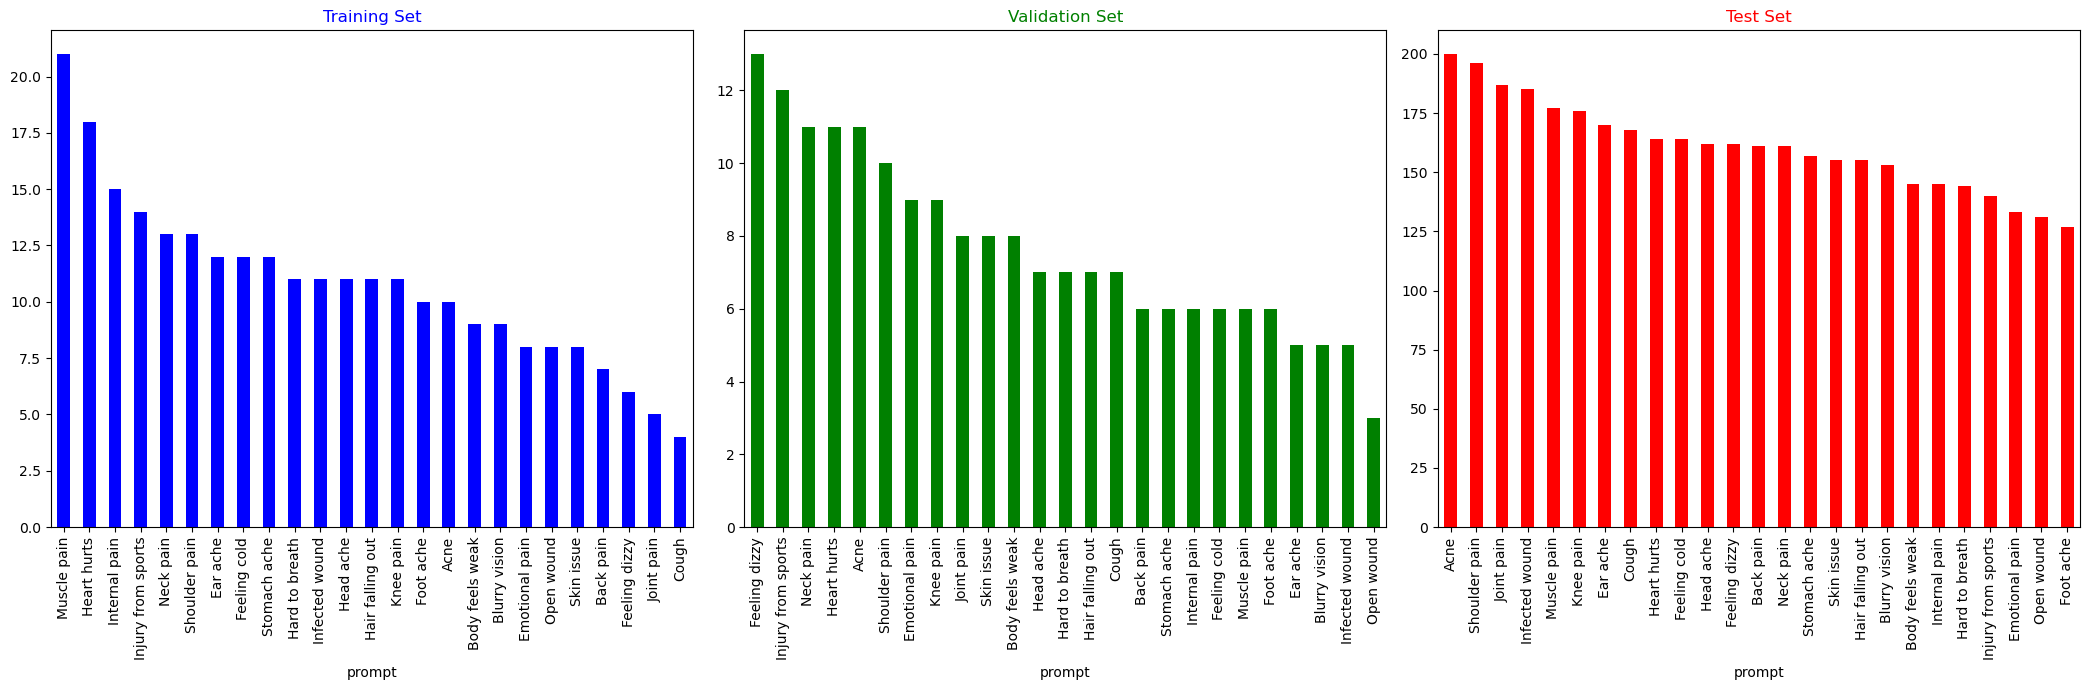

In [7]:
# see the distribution of the prompts (labels) in the training, validation and test set
train_df = record_df[record_df.split == "train"]
valid_df = record_df[record_df.split == "validate"]
test_df = record_df[record_df.split == "test"]

fig, axs = plt.subplots(1, 3, figsize=(21, 7))  # 1 row, 3 columns

train_df.prompt.value_counts().plot(kind="bar", ax=axs[0], color='blue')
axs[0].set_title('Training Set', color='blue')

valid_df.prompt.value_counts().plot(kind="bar", ax=axs[1], color='green')
axs[1].set_title('Validation Set', color='green')

test_df.prompt.value_counts().plot(kind="bar", ax=axs[2], color = "red")
axs[2].set_title('Test Set', color="red")

plt.tight_layout()
plt.show()

### Get the audio data with the metadata


In [8]:
train_path = "./data/recordings/train"
waveforms = []
for file in tqdm(os.listdir(train_path)):
    waveform, sample_rate = torchaudio.load(os.path.join(train_path, file))
    mean_waveform = torch.mean(waveform, dim=0, keepdim=True)
    waveforms.append(mean_waveform)
    metadata = record_df[record_df["file_name"] == file]


100%|██████████| 381/381 [00:01<00:00, 268.68it/s]


The waveforms has 2 channels (left and right). We can only both or use the mean of both channels. 


Let's use the mean for convenience to start 


### First idea : analyze the waveform


### Second idea : Use the phrase from the metadata


Use a pre trained transformer model to get the embeddings of the phrase 


### Compare both 


### Use a combination of both
